#  Lung Cancer Prediction
## Lung cancer Dataset

According to World Health Organization, lung cancer is the primary cause of cancer-related fatalities globally, presenting the highest mortality rates for both men and women. In addition, unfortunately lung cancer is frequently identified in advanced stages, restricting the available treatment options. This underscores the importance of developing effective predictive models, that can help in early detection.
The main issues with the developing of effective machine learning models for the detection of pulmonary malignancy are the integration of multi-modal data and imbalances in datasets. In medical research, a moltitude of different types of data is collected, such as imaging, clinical or genetic data. Combine and analyze these data in order to develop effective method is a really complex task. Another problem with the data is the imbalance in datasets. Certain types of lung cancer can be underrepresented. This has an effect on the performance of machine learning models. 
The goal of this project is to define a model to predict lung cancer based on some risk factors and symptoms.

## Dataset

The dataset analyzed in this notebook is published on: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

The dataset is composed by 1000 records and 26 columns, which represent the risk factors and symptoms of lung cancer. Additionally, the last column includes three categories indicating the risk levels of lung cancer: Low, Medium, and High.
Most of the attributes were collected based on 3 different numerical rating scales to represent the intensity of the symptom or of the risk factor. 

The following attributes are based on a scale from 1-7:
1. Genetic Risk
2. Chronic Lung Disease
3. Obesity
4. Frequent Cold
5. Dry Cough
6. Snoring
7. Balanced Diet

The following attributes on a scale from 1-8:
1. Occupational Hazards
1. Air Pollution
1. Dust Allergy
1. Smoking
1. Passive Smoker
1. Weight Loss
1. Wheezing
1. Swallowing Difficulty
1. Alcohol Use

The following attributes on a scale 1-9:
1. Chest pain
1. Coughing of blood
1. Fatigue
1. Shortness of breath
1. Clubbing of Finger Nails 

For each record, there are also the following informations:
1. Patient ID
1. Age
1. Gender

These attributes are going to be the feautures in the predictive model. The target variable will be "Level".

### Import the libraries and the data

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [168]:
data=pd.read_csv('cancer patient data sets.csv', header=0)
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Data Wrangling

In [169]:
#Checking the dimensions
print('Number of rows = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
#checking missing values and data type
data.info()

#Checking for duplicate rows
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of rows = 1000
Number of attributes = 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 

The dataset is made of 1000 rows and 26 attributes. As we can see, there are no missing values and no duplicate rows. 
For this analysis, the attribute "Patient ID" and the column "Index" can be removed.

In [170]:
data=data.drop(['Patient Id','index'], axis=1)

Gender [1, 2]
Genetic Risk [1, 2, 3, 4, 5, 6, 7]
chronic Lung Disease [1, 2, 3, 4, 5, 6, 7]
Obesity [1, 2, 3, 4, 5, 6, 7]
Frequent Cold [1, 2, 3, 4, 5, 6, 7]
Dry Cough [1, 2, 3, 4, 5, 6, 7]
Snoring [1, 2, 3, 4, 5, 6, 7]
Balanced Diet [1, 2, 3, 4, 5, 6, 7]
OccuPational Hazards [1, 2, 3, 4, 5, 6, 7, 8]
Air Pollution [1, 2, 3, 4, 5, 6, 7, 8]
Dust Allergy [1, 2, 3, 4, 5, 6, 7, 8]
Smoking [1, 2, 3, 4, 5, 6, 7, 8]
Passive Smoker [1, 2, 3, 4, 5, 6, 7, 8]
Weight Loss [1, 2, 3, 4, 5, 6, 7, 8]
Wheezing [1, 2, 3, 4, 5, 6, 7, 8]
Swallowing Difficulty [1, 2, 3, 4, 5, 6, 7, 8]
Alcohol use [1, 2, 3, 4, 5, 6, 7, 8]
Chest Pain [1, 2, 3, 4, 5, 6, 7, 8, 9]
Coughing of Blood [1, 2, 3, 4, 5, 6, 7, 8, 9]
Fatigue [1, 2, 3, 4, 5, 6, 8, 9]
Shortness of Breath [1, 2, 3, 4, 5, 6, 7, 9]
Clubbing of Finger Nails [1, 2, 3, 4, 5, 6, 7, 8, 9]
Level ['High', 'Low', 'Medium']


<Axes: xlabel='Age'>

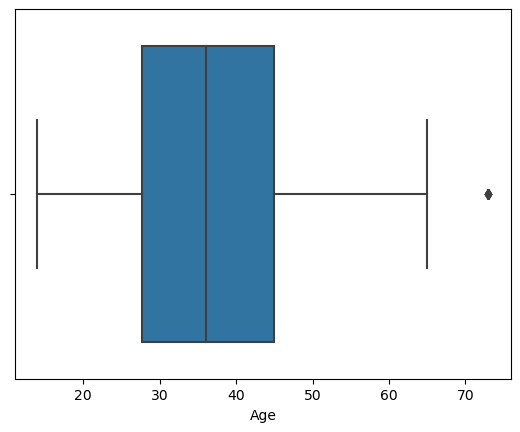

In [171]:
#Looking for outliers
scale17=['Genetic Risk','chronic Lung Disease','Obesity','Frequent Cold','Dry Cough','Snoring','Balanced Diet']
scale18=['OccuPational Hazards','Air Pollution','Dust Allergy','Smoking','Passive Smoker','Weight Loss','Wheezing','Swallowing Difficulty','Alcohol use']
scale19=['Chest Pain','Coughing of Blood','Fatigue','Shortness of Breath','Clubbing of Finger Nails']
desired_order=["Age", "Gender"] + scale17 + scale18 + scale19 + ["Level"]
data = data[desired_order]
namescol=data.columns.tolist() 
for col in namescol[1:]:
    print(data[col].name, sorted(data[col].unique()))
#Looking for outlier in the variable "Age"
sns.boxplot(data=data, x="Age")

In [172]:
#checking the number of outliers in 'Age'
len(data.loc[data['Age'] > 70])

10

The dataset doesn't have outliers except in feature 'Age'.The boxplot shows that there are 10 outliers in the 'Age' variable. These patients are older than 70 years. As an inherent part of the studied population, they will not be removed.

Our target variable is 'Level'. It describes the risk level of lung cancer. It's a ordinal variable with 3 categories: "Low","Medium", "High".

In [173]:
data['Level'].unique()
#defining the ranking of the categories
severity_levels = ['Low', 'Medium', 'High'] 
data['Level'] = pd.Categorical(data['Level'], categories=severity_levels, ordered=True)

### Data Visualization

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


<Axes: title={'center': 'Sample Distribution by different level of Risk Level of getting Lung Cancer'}, ylabel='count'>

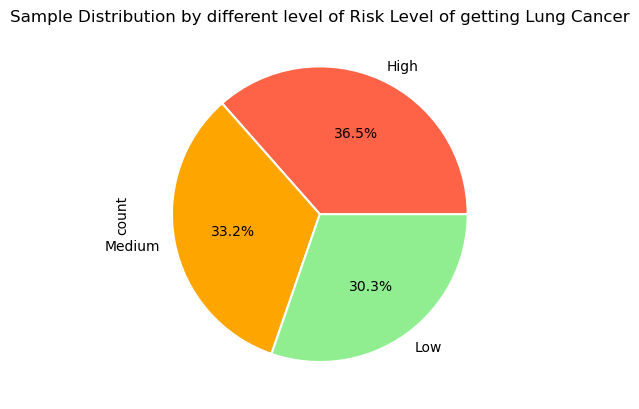

In [174]:
#Inspect the target variable in the dataset
fig, ax = plt.subplots()
levelcount=data['Level'].value_counts()
colors = ['tomato','orange','lightgreen']
print(levelcount)
levelcount.plot(kind='pie', title='Sample Distribution by different level of Risk Level of getting Lung Cancer', colors=colors, autopct='%1.1f%%', wedgeprops={"linewidth": 1.5, "edgecolor": "white"})

The plot shows the distribution of the target variable in the dataset. The majority of the patients have an high risk of having a lung cancer (365 out of 1000). The 3 categories present similar frequency, so the dataset is pretty much balanced. 

Text(0.5, 1.0, 'Boxplot of Age Distribution by Risk Level')

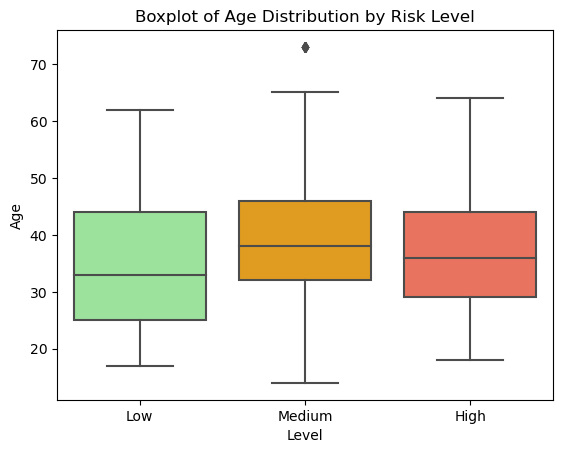

In [175]:
#Analyzing some variable in relation of the target variable 'Level'
color_discrete_map= {'High': 'tomato','Medium': 'orange','Low': 'lightgreen'}
sns.boxplot(data=data, x="Level", y="Age", palette=color_discrete_map).set_title("Boxplot of Age Distribution by Risk Level")

People with a Medium Risk show an higher median age. Furthermore, both the first quartile and the third quartile are positioned higher compared to their respective quartiles in the other 2 distributions. So we can conclude that people with a Medium risk tend to be older. Indeed, in this distribution we can see the 10 outliers patients.
We can also notice that there's more variability between people with a low risk and higher levels of risk, since the distribution of low risks has a higher interquartile range.

Gender    1    2
Level           
Low     149  154
Medium  197  135
High    252  113


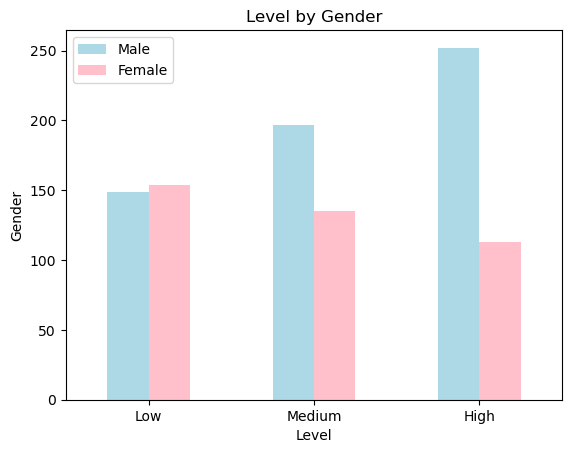

In [176]:
#Gender
fig, ax = plt.subplots()
df=data.loc[:, ['Gender', 'Level']]
dfp = df.pivot_table(index='Level', columns=['Gender'], aggfunc=len)
print(dfp)
dfp.plot(kind='bar', stacked=False, ylabel='Gender', xlabel='Level',
         title='Level by Gender', rot=0, ax=ax, color=['lightblue','pink'])
ax.legend(["Male", "Female"])

From the plot, we can see that men tend to be more in higher levels of risks. On the contrary, female have a low presence in both High and Medium level of cancer risk.

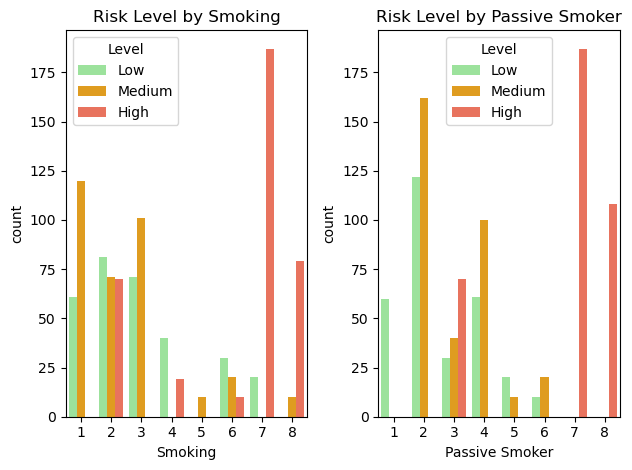

In [177]:
#Smoking
fig, axes = plt.subplots(1,2)
sns.countplot(data, x="Smoking", hue="Level", palette=color_discrete_map, ax=axes[0])
axes[0].set_title('Risk Level by Smoking')
#Passive smoker
sns.countplot(data, x="Passive Smoker", hue="Level", palette=color_discrete_map, ax=axes[1])
axes[1].set_title('Risk Level by Passive Smoker')

plt.tight_layout()
plt.show()

Looking at the 'Risk level by Smoking', it is clearly visible that the risk grows as the smoking intensity increases. In the higher intensity levels such as 7 and 8, there's huge number of High Risk level. We can notice the same phenomenon in the plot 'Risk Level by Passive Smoker'. In this case, at the intensity levels of 7 and 8, it's present exclusively the category of high risk. So, we can conclude that smoke is a significant risk factor of lung cancer. 

In [178]:
#For every feature
#for column in data.iloc[:, 1:]:
#    sns.countplot(data, x=column, hue="Level", palette=color_discrete_map)
#    plt.show()

Next, the exploration will examine the correlation between the different features with the target and their importance.

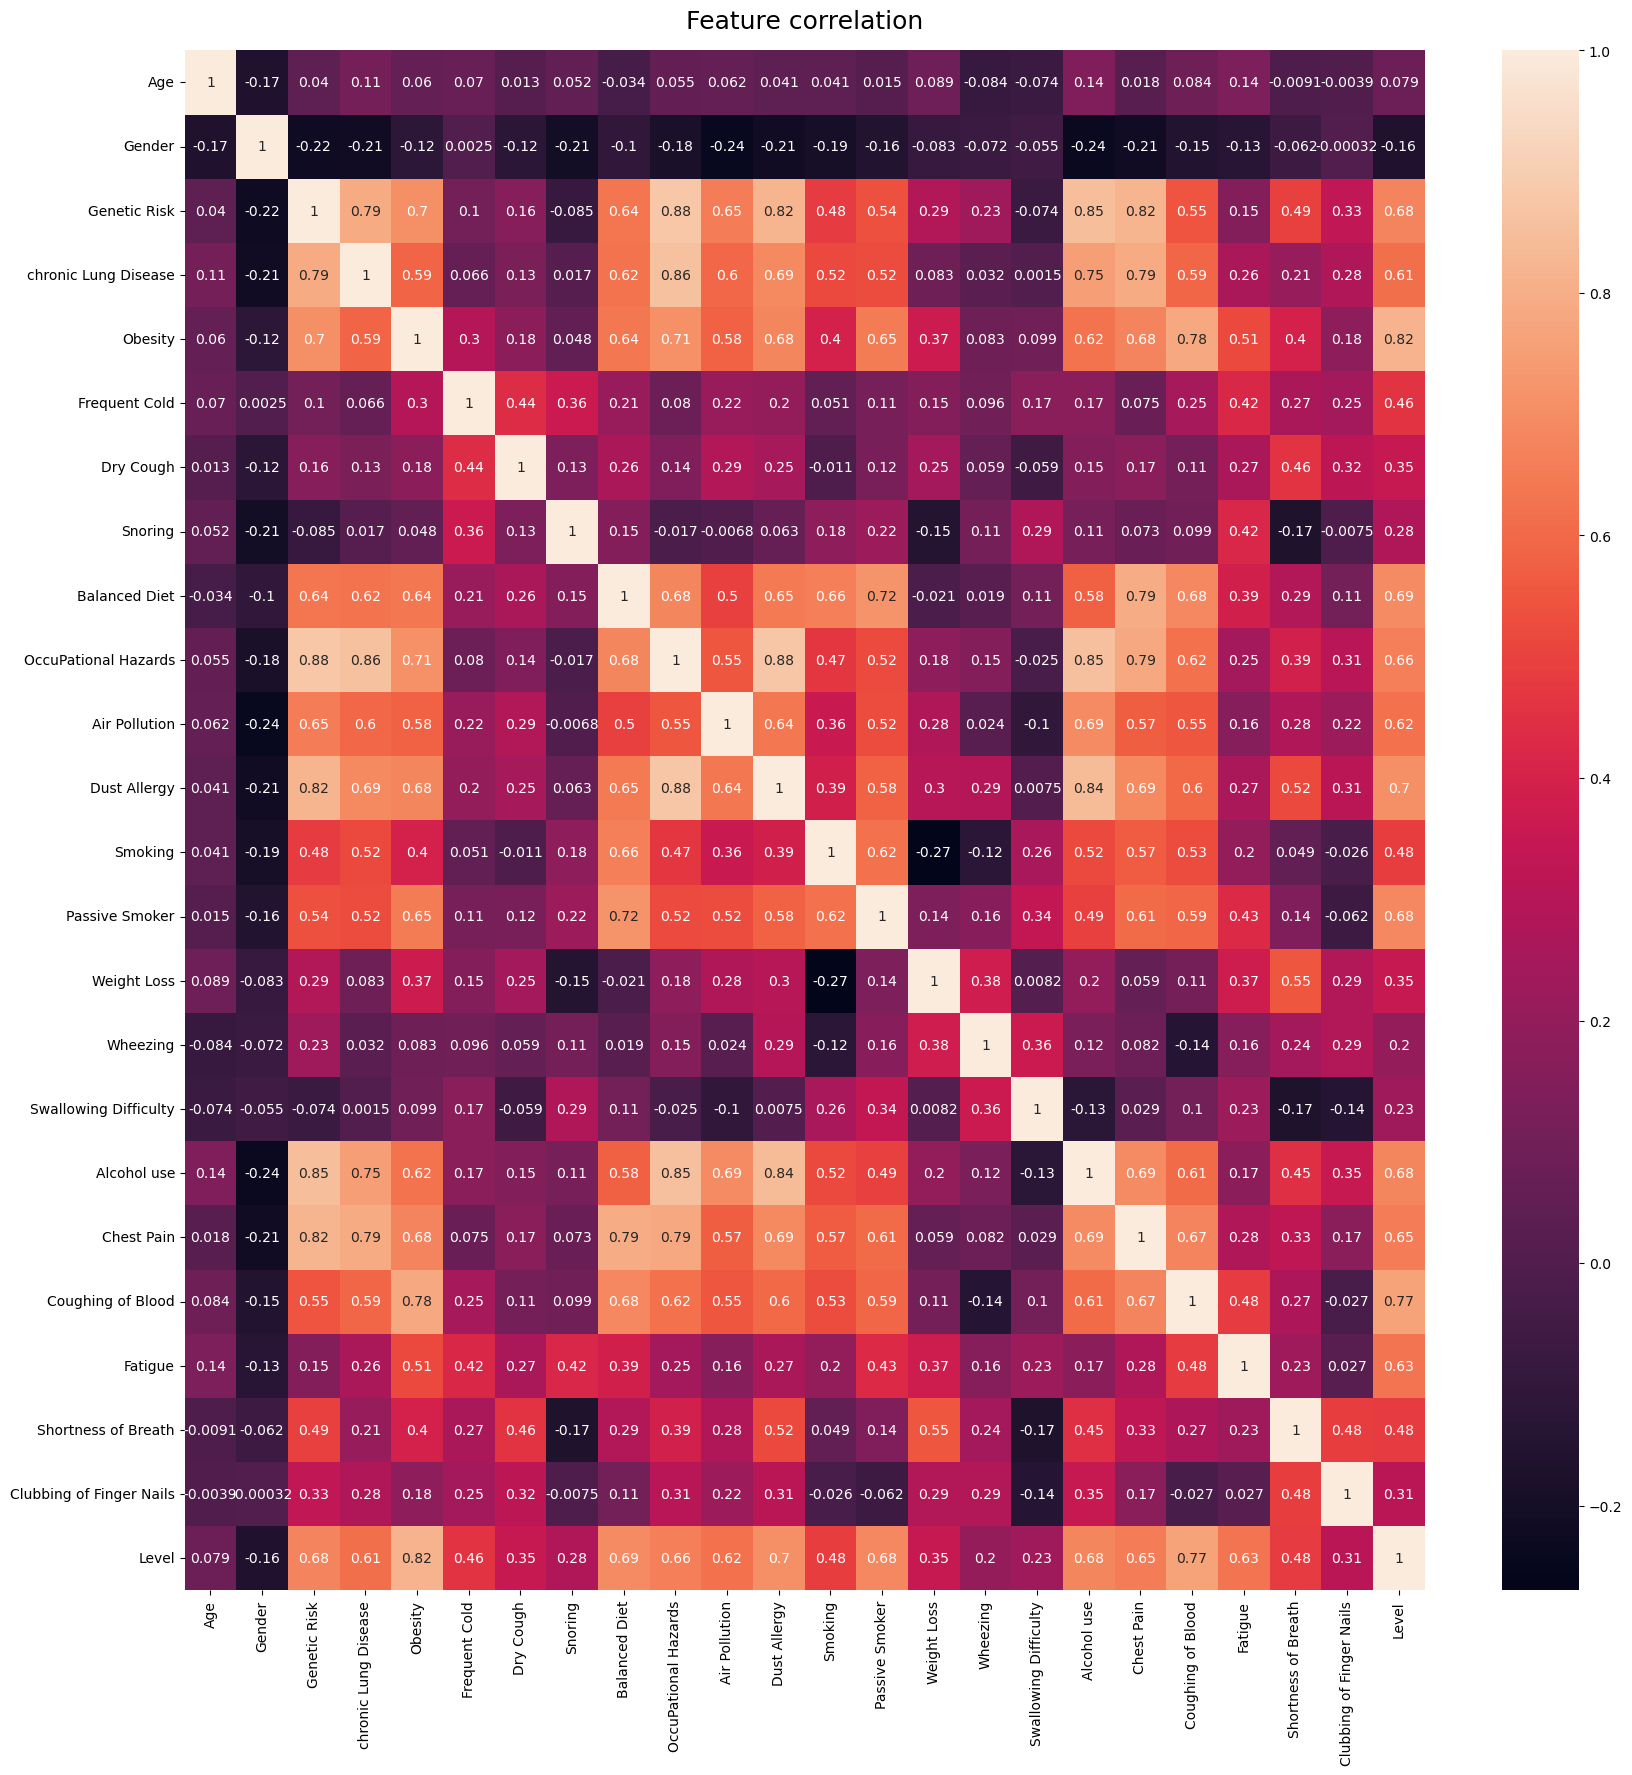

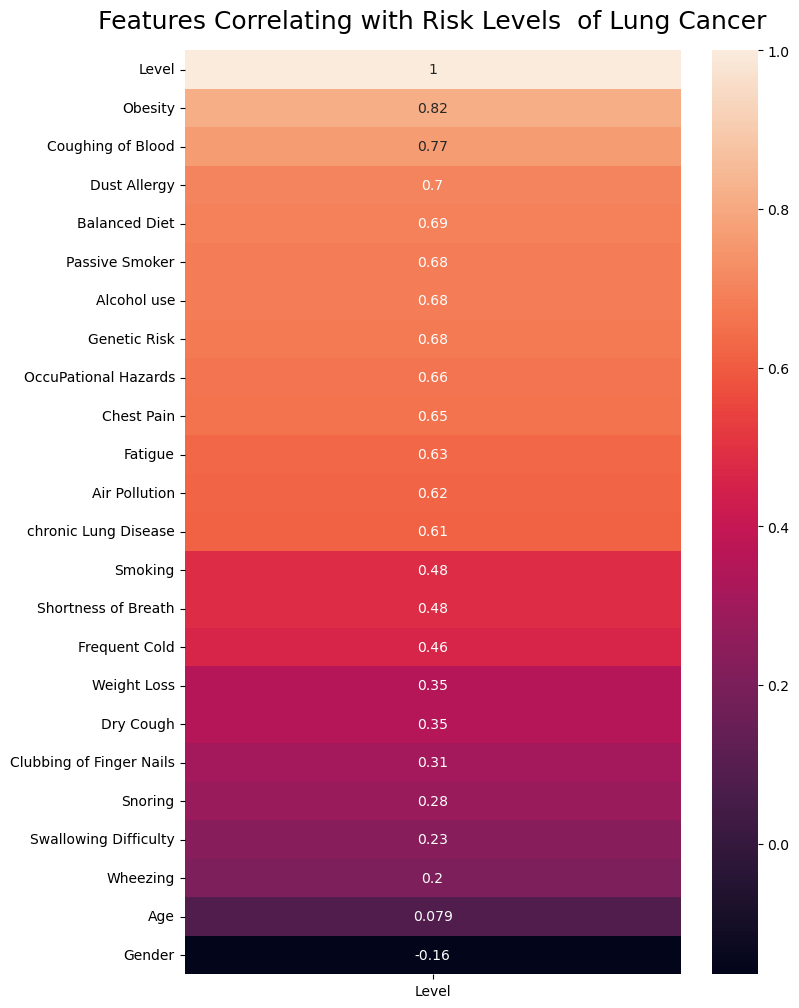

In [179]:
new_data= data.copy()
new_data['Level'].replace(['Low', 'Medium','High'],
                        [1, 2, 3], inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr(method = 'spearman'), cbar=True, annot=True).set_title('Feature correlation', fontdict={'fontsize':18}, pad=16)

new_data.corr(method = 'spearman')[['Level']].sort_values(by='Level', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(new_data.corr(method = 'spearman')[['Level']].sort_values(by='Level', ascending=False), annot=True, cbar=True)
heatmap.set_title('Features Correlating with Risk Levels  of Lung Cancer', fontdict={'fontsize':18}, pad=16);

Thanks to the correlation matrix, we can visualize the correlation between the different features in the dataset. Darker shades represent weaker correlations, where orange shades represent positive and strong correlations. In every cell is annotated with the Spearman's correlation coefficient. The variable 'Gender' has the weakest correlation with the other feauture.

In the second figure we can look at how each feature correlates with the target variable. Obesity, Coughing of Blood and Dust Allergy are the feature with the highest correlation with our dependent variable. This means that these feature have a tendency to increase when the risk level of lung cancer increases. Age and Gender have the lowest values.

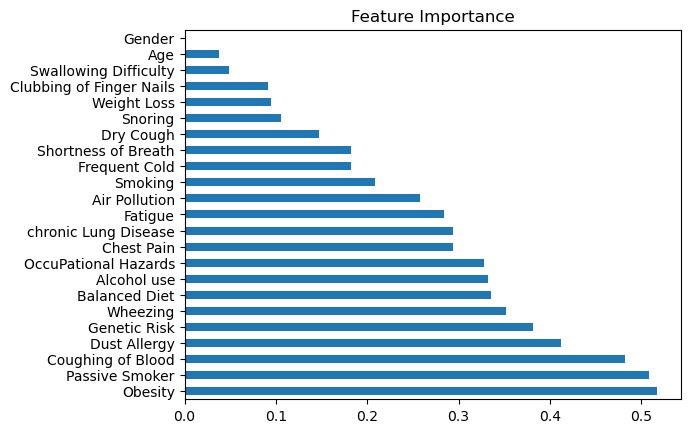

In [180]:
x=new_data.values[:,:23]
y=new_data.values[:, -1]
importance=mutual_info_classif(x,y)
feat_importances=pd.Series(importance,new_data.columns[0:len(new_data.columns)-1])
feat_importances.sort_values(ascending=False).plot(kind='barh').set_title('Feature Importance')
plt.show()

With the above barplot, it's noticeable that the most important features are Obesity, Passive Smoker and Coughing of Blood. Obesity and Coughing of blood presented also an high correlation with the target variable. The least important feature are Age and Gender. They also had a almost null correlation with the target variable.

### CLASSIFICATION

For this project, I want to use 2 different classification techniques to predict the risk level of lung cancer. First, we are going to build a decision tree. In the second part, we are going to use SVC.

In [181]:
#data prepocessing
x=new_data.values[:,:23]
y=new_data.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

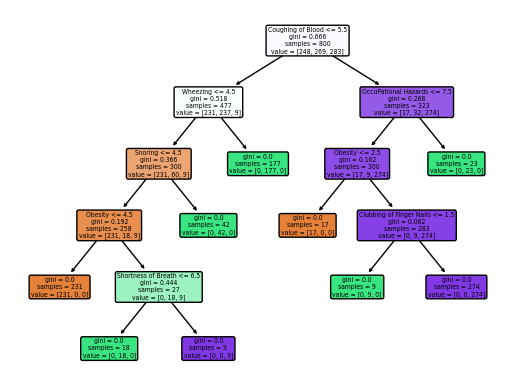

In [182]:
#MODEL 1: DECISION TREE
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#To plot the tree
features=new_data.columns.tolist()
tree.plot_tree(clf, filled=True, rounded=True, feature_names=features)

y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



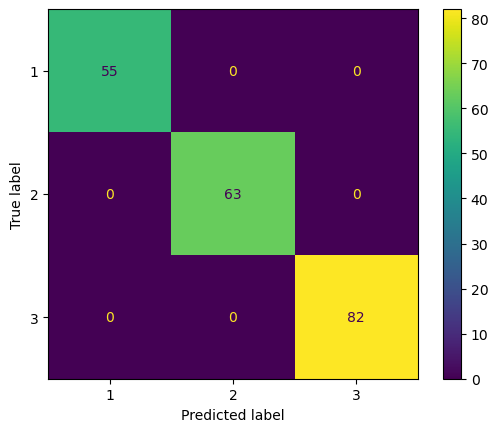

In [183]:
#METRICS OF THE DECISION TREE
treereport=classification_report(y_test, y_pred)
print(treereport)
#plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

The decision tree model has a perfect accuracy and precision for each class. It's evident that it was able to classify correctly every instance, with no false positives or false negatives.
Nonetheless, it's important to verify its ability on unseen data and to consider potential overfitting. So, further evaluation and validation are essential to determine its effectiveness.

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        55
           2       0.91      0.98      0.95        63
           3       0.99      1.00      0.99        82

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



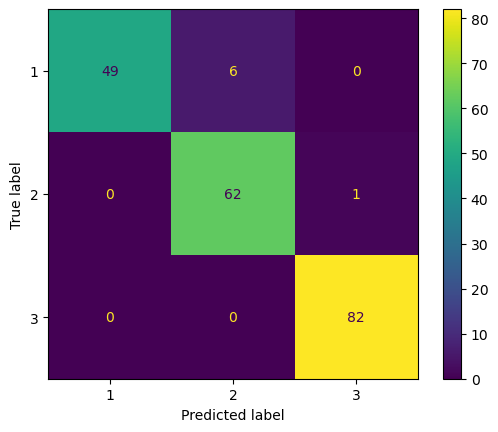

In [184]:
#Model 2: SVC
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 
#predictions
predictions = model.predict(X_test)
#Metrics and confusion matrix
svcreport=classification_report(y_test, predictions)
print(svcreport) 
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

The SVC technique shows magnificent results. The model has a very good accuracy (0.96) and high precision for each class. It makes some minor mistakes, especially when trying to classify instances from the Low risk class. 6 units where misclassified and labeled as Medium Risk. Indeed the recall for that class is the lowest among the other recall rates.
It seems that this classifier has a great classifyng abilities.
#### Parameter tuning using cross-validation
In this part, we are going to search for the best combination of parameters to determine the best predicting model. We will change the C parameter, gamma and the kernels.

In [185]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)
print('The best parameters are',grid.best_params_,', with a score of', grid.best_score_)

grid_predictions = grid.predict(X_test) 
  
#METRICS OF BEST MODEL SVC
#print(classification_report(y_test, grid_predictions)) 

The best parameters are {'C': 1, 'gamma': 1, 'kernel': 'linear'} , with a score of 1.0


In [186]:
#BEST SVC MODEL
model = SVC(C=1,kernel='linear', gamma=1) 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



With the tuning of the parameters, we achieved a model with exceptional performance (precision=1, accuracy=1) as we did with the decision tree. The same comments about its validity also apply in this case.

### RESULTS

The models obtained in this project proved exceptional ability to classify and predict the level of cancer risk in the population. This means that the classifiers were able to understand and capture the patterns in the data. However, it's important to notify that the dataset used might be intentionally crafted for optimal results. This might explain the perfect results, obtained in the notebook. So, further validation on diverse dataset are necessary to evaluate the models' performance in more realistic dataset.

#### Self-critical assessment of the project (most challenging, strong aspects, weak points)
I've learned a lot from working on this project. I didn't know a lot about Python, so working on a project was really the best way for me to learn better this programming language. For me, one of the most challenging tasks was to comment all the different plots and metrics.
I think that the biggest weak point of this project is probably the perfectly engineered dataset, that influenced the results. In addition, the dataset's "perfection" didn't really allow me to work on validation methods.